# CSE 4502/5717: Big Data Analytics
## Tutorial C: Extra Credit

The MNIST dataset is a public dataset of grayscale images (28x28 pixels) of digits handwritten by high school students and employees of the US Census Bureau. Each image is labelled with the digit it represents.

The code below import images from the MNIST dataset in the matrix X and the corresponding labels in the vector Y. Note that each image is a row of 784 numbers in X, and each number is the grayscale value of one of the 784 pixels forming the image.

### Preprocessing the MNIST dataset

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Turn down for faster convergence
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Inspecting the data

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

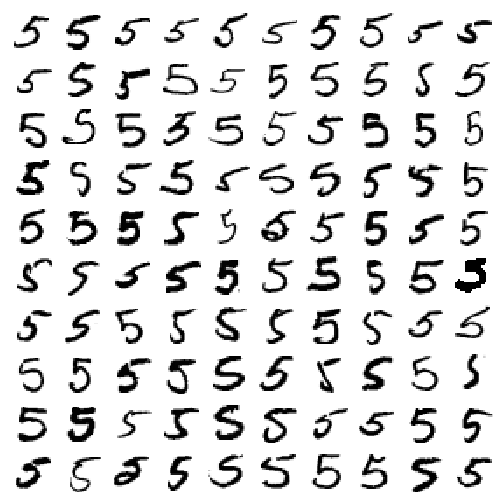

In [3]:
digit = '5'
plt.figure(figsize=(9,9))
X_0 = X[(y == digit)]
example_images = X_0[:100]
plot_digits(example_images, images_per_row=10)

### Design classifiers to predict the represented digit based on grayscale value of the 784 pixels forming the image.
#### Support Vector Machine with soft margins
Use a soft-margin SVM and vary the regularization parameter using the values given below.

In [4]:
regularization = [0.01, 0.1, 10, 100]

In [5]:
# add code here
svm_clf_list = []          #List for storage
y_pred_list = []
for i in range(len(regularization)):
    svm_clf_list.append(SVC(C=regularization[i]))
    svm_clf_list[i].fit(X_train, y_train)
    y_pred_list.append(svm_clf_list[i].predict(X_test))
    print(accuracy_score(y_test, y_pred_list[i]))
    

0.3954
0.8503
0.9318
0.932


#### Support Vector Machine with kernel-based transformation
Use a kernel-based SVM to achieve an accuracy of 92% or higher.

In [6]:
# add code here
classifier_k = SVC(kernel = 'poly', tol = 1e-4, C=5, gamma = .05)
classifier_k.fit(X_train, y_train)

SVC(C=5, gamma=0.05, kernel='poly', tol=0.0001)

In [7]:
y_pred = classifier_k.predict(X_test)

In [8]:
accuracy_score(y_test, y_pred)

0.943

In [9]:
confusion_matrix(y_test, y_pred)

array([[ 971,    0,    6,    1,    0,    2,    8,    2,    4,    1],
       [   0, 1109,    8,    3,    5,    0,    5,    2,    5,    1],
       [   1,    2,  912,   10,   12,    3,    1,   11,   42,    0],
       [   0,    0,   13,  954,    0,   28,    0,    8,   35,    4],
       [   0,    1,    5,    0,  932,    0,    2,    5,    1,   17],
       [   2,    0,    1,   23,    6,  864,   14,    3,   19,    8],
       [   5,    0,    9,    0,    5,    8,  950,    0,   11,    0],
       [   5,    2,    8,    4,   20,    1,    0,  977,   12,   27],
       [   1,    2,    5,   15,    4,    7,    6,    1,  880,    5],
       [   3,    2,    7,   12,   24,    5,    0,   13,   11,  881]],
      dtype=int64)

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       995
           1       0.99      0.97      0.98      1138
           2       0.94      0.92      0.93       994
           3       0.93      0.92      0.92      1042
           4       0.92      0.97      0.95       963
           5       0.94      0.92      0.93       940
           6       0.96      0.96      0.96       988
           7       0.96      0.93      0.94      1056
           8       0.86      0.95      0.90       926
           9       0.93      0.92      0.93       958

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

